# Import Library

In [2]:
#!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 281.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 365.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 514.3 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 850.1 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 958.5 kB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Load Data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/eparamasari/temp-repo/main/text-data.tsv", sep="\t", names=["text", "label"])

Sumber data: https://huggingface.co/datasets/indonlp/indonlu

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [5]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [6]:
df.tail()

,text,label
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative
10999,meskipun sering belanja ke yogya di riau junct...,positive


## Cek jumlah kolom dan total data

Data yang diolah memiliki 2 kolom dan total data 11000

In [7]:
df.shape

(11000, 2)

## Cek total duplikat data

Total data yang duplikat sejumlah 67

In [8]:
df.duplicated().sum()

67

Menghilangkan data yang duplikat

In [9]:
df = df.drop_duplicates()

Cek total data yang duplikat. Hasilnya data yang duplikat sudah tidak ada.

In [10]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [11]:
df.isna()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10993,False,False
10994,False,False
10996,False,False
10998,False,False


Jalankan perintah dibawah untuk melihat persentase missing values dari setiap kolom. Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [12]:
df.isna().sum()/df.shape[0]

text     0.0
label    0.0
dtype: float64

Cek kondisi data terakhir

In [13]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


## Buat kolom baru bernama "total_char" berisi panjang karakter dari setiap teks.

In [14]:
df['total_char'] = df.text.apply(len)

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_char" yang berisi masing-masing panjang karakter dari setiap teks.


In [15]:
df.head()

,text,label,total_char
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102
2,lokasi strategis di jalan sumatera bandung . t...,positive,184
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214


## Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [16]:
df['total_word'] = df.text.apply(lambda sent: len(sent.split()))

In [17]:
df.head()

,text,label,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,38


# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel.

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistics

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_char" memiliki rata-rata panjang karakter 189.6, sedangkan "total_word" memiliki rata-rata 33.0 kata.

In [21]:
df["total_char"].mean()

189.61456141955549

In [22]:
df["total_word"].mean()

33.060550626543495

##### Median

Digunakan untuk mencari nilai tengah dari suatu data numerical yang diurutkan. Jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah.

Pada hasil berikut median "total_char" memiliki nilai tengah panjang karakter 161.0, sedangkan "total_word" memiliki nilai tengah 28.0 kata.

In [23]:
df["total_char"].median()

161.0

In [24]:
df["total_word"].median()

28.0

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "total_char" memiliki frekuensi yang paling sering muncul yakni panjang karakter 120, sedangkan "total_word" memiliki frekuensi yang paling sering muncul 10 kata.

In [25]:
df['total_char'].mode()

0    120
Name: total_char, dtype: int64

In [26]:
df['total_word'].mode()

0    10
Name: total_word, dtype: int64

#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "total_char" memiliki perbedaan sebesar 564, sedangkan "total_word" memiliki perbedaan sebesar 109 kata.

In [27]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

109

In [28]:
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

564

##### Quartile dan IQR

Digunakan ketika data dibagi menjadi 4 bagian (25%). Terdapat 3 jenis Quartile yaitu Q1 yang merupakan nilai antara median dengan data terkecil, Q2 yang merupakan Median data, dan Q3 adalah nilai antara median dengan data terbesar.

Nilai Quartile selanjutnya dikombinasikan dengan nilai Interquartile Range (IQR). Untuk menghasil IQR kita dapat mengurangi Q3 dengan Q1. Dari IRQ kita dapat menemukan batas atas dan batas bawah dari sebuah data.

Hasil dibawah menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

In [29]:
# Cari nilai minimum
p0 = df.total_char.min()

# Cari nilai maksimum
p100 = df.total_char.max()

# Cari Quartile 1
q1 = df.total_char.quantile(0.25)

# Cari Quartile 2
q2 = df.total_char.quantile(0.5)

# Cari Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -186.5
Nilai minimum 3
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 553.5
Nilai maksimum 567
Ada outlier dari sisi batas atas


Hasil di bawah menunjukkan nilai sisi bawah dari "total_word" tidak memiliki outlier, sedangkan sisi atas dari "total_word" memiliki outlier.

In [30]:
# Cari nilai minimum
p0 = df.total_word.min()

# Cari nilai maksimum
p100 = df.total_word.max()

# Cari Quartile 1
q1 = df.total_word.quantile(0.25)

# Cari Quartile 2
q2 = df.total_word.quantile(0.5)

# Cari Quartile 3
q3 = df.total_word.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word': -32.0
Nilai minimum 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_word': 96.0
Nilai maksimum 110
Ada outlier dari sisi batas atas


##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai variance dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [32]:
df["total_char"].var()

14600.712931011893

In [33]:
df["total_word"].var()

446.9555356279938

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai standard deviation dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [34]:
df["total_char"].std()

120.83340982945029

In [35]:
df["total_word"].std()

21.14132293939984

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "total_char" dan "total_word" bernilai positif.

In [36]:
df["total_char"].skew()

0.5607797398477247

In [37]:
df["total_word"].skew()

0.5369781695548399

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_char" dan "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [38]:
df["total_char"].kurtosis()

-0.7565745851953514

In [39]:
df["total_word"].kurtosis()

-0.7692879147531273

### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi.

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.

<Axes: ylabel='label'>

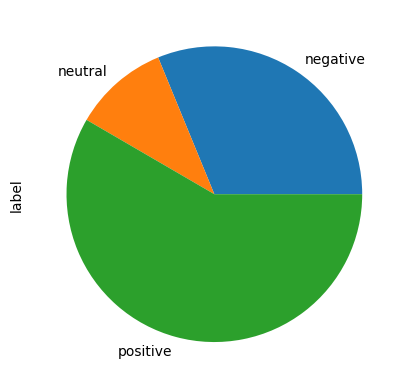

In [40]:
df.groupby('label').label.count().plot(kind='pie')

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah karakter (total_char).

Berdasarkan gambar di bawah terlihat rata-rata panjang karakter dari data teks yang kita miliki ada pada sekitar 100-200 karakter.

<Axes: >

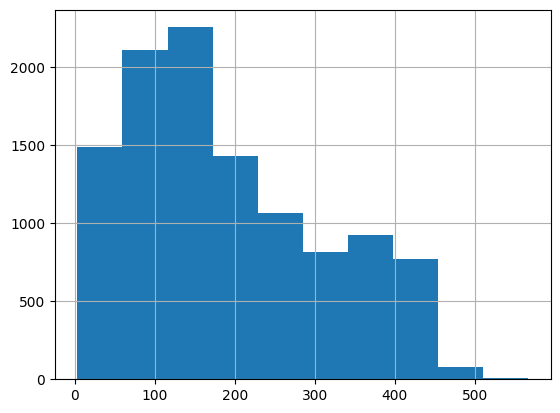

In [41]:
df.total_char.hist()

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

<Axes: >

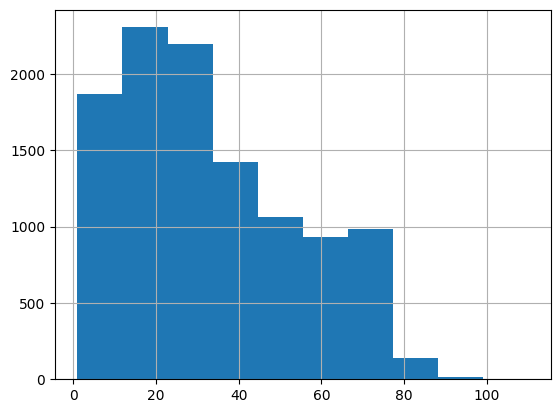

In [42]:
df.total_word.hist()

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen negatif, mayoritas panjang karakternya 0-200 karakter dan panjang katanya sekitar 50 kata.
*   Pada sentimen netral, mayoritas panjang karakternya sekitar 100 karakter dan panjang katanya sekitar 25 kata.
*   Pada sentimen positif, mayoritas panjang karakternya 200-400 karakter dan panjang katanya sekitar 30-70 kata.


array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

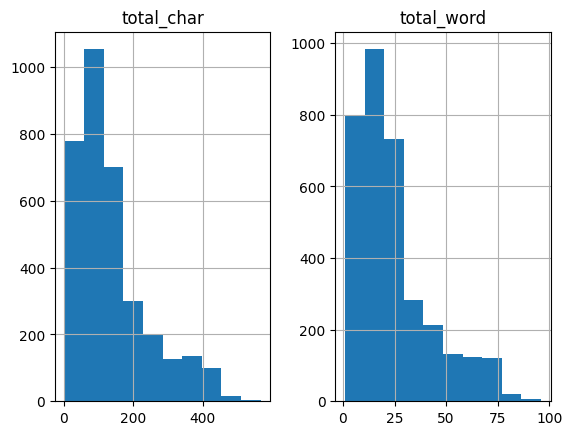

In [43]:
df_negative = df.loc[df['label'] == 'negative']

df_negative.hist()

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

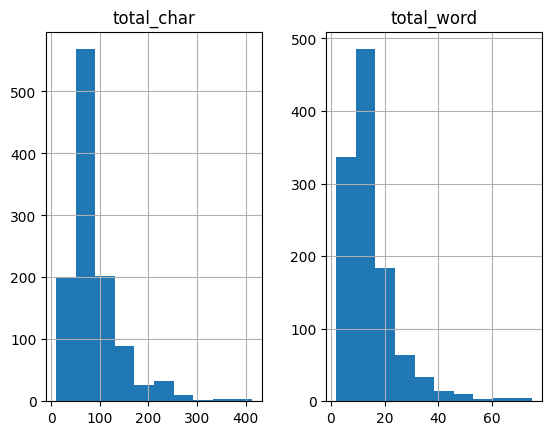

In [44]:
df_neutral = df.loc[df['label'] == 'neutral']

df_neutral.hist()

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

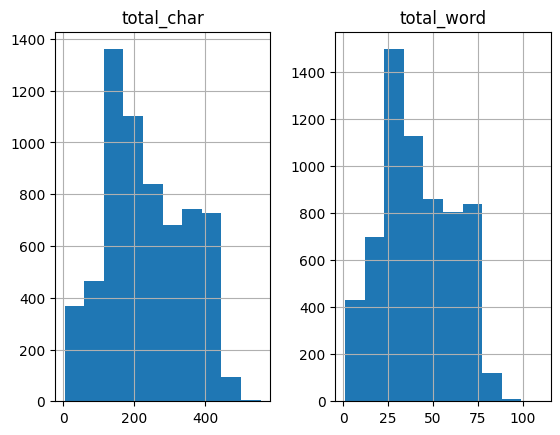

In [45]:
df_positive = df.loc[df['label'] == 'positive']

df_positive.hist()

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

In [47]:
#!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 751.6 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


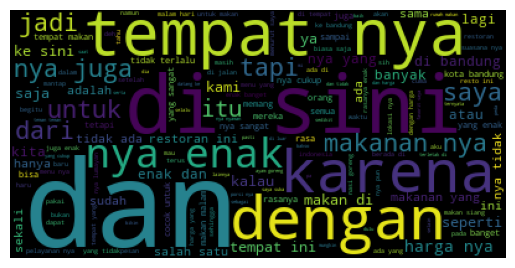

In [48]:
from wordcloud import WordCloud
text = ' '.join(df['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan".
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

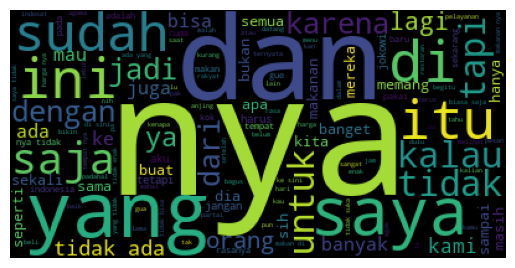

In [49]:
from wordcloud import WordCloud

df_negative = df.loc[df['label'] == 'negative']

text = ' '.join(df_negative['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

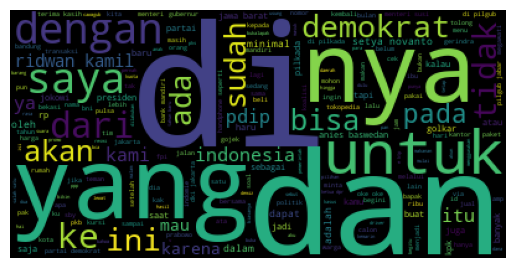

In [50]:
from wordcloud import WordCloud

df_neutral = df.loc[df['label'] == 'neutral']

text = ' '.join(df_neutral['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

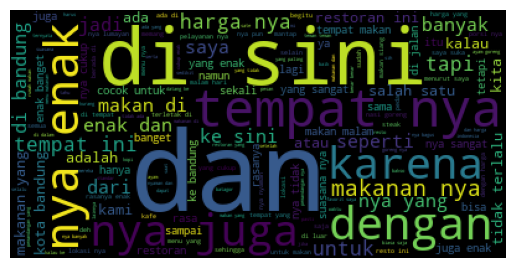

In [51]:
from wordcloud import WordCloud

df_positive = df.loc[df['label'] == 'positive']

text = ' '.join(df_positive['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_word" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10933 entries, 0 to 10999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10933 non-null  object
 1   label       10933 non-null  object
 2   total_char  10933 non-null  int64 
 3   total_word  10933 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 427.1+ KB


In [59]:
df[["total_char", "total_word"]].corr(numeric_only=False)

,total_char,total_word
total_char,1.000000,0.991289
total_word,0.991289,1.000000


### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

<Axes: xlabel='total_word', ylabel='total_char'>

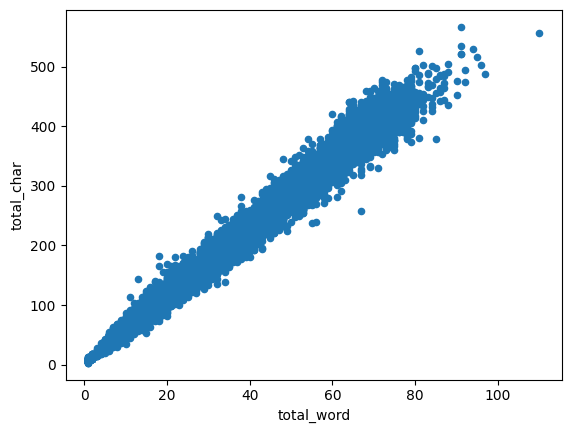

In [60]:
df.plot(x='total_word',y='total_char',kind = 'scatter')

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

<Axes: xlabel='label'>

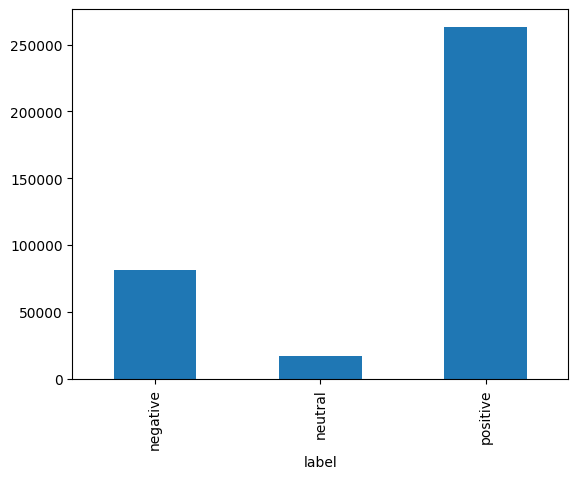

In [61]:
df.groupby('label').total_word.sum().plot(kind='bar')

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

<Axes: xlabel='label'>

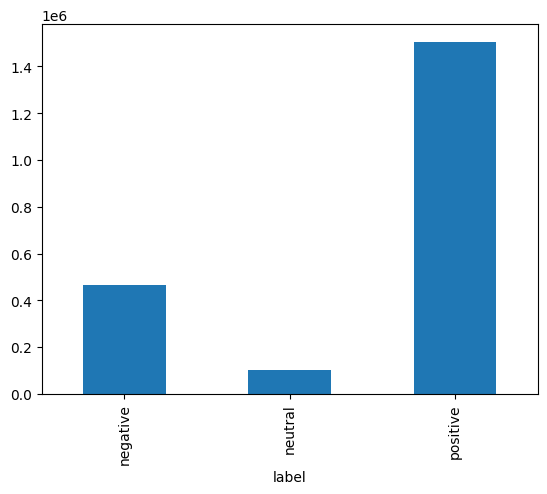

In [62]:
df.groupby('label').total_char.sum().plot(kind='bar')

# Conclusion

Berdasarkan analisis yang sudah kita lakukan, ada beberapa insight yang bisa kita ambil:

*   Berdasarkan Univariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan data yang kita olah memiliki outlier namun tidak terlalu signifikan
  *  Dalam visualisasi menunjukkan:
      *  Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
      *  Sentimen terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.
      *  Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
      *  Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

*   Berdasarkan Bivariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan variabel total karakter dan total kata memiliki korelasi positif.
  *  Dalam visualisasi menunjukkan:
      *  Variabel total karakter dan total kata terkonfirmasi memiliki korelasi positif
      *  Total karakter dan kata yang paling banyak adalah sentimen positif.